# Convolutional Neural Network on the MNIST Dataset
This is a notebook that builds and trains a simple CNN on the ever so popular [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). The MNIST dataset is a large collection of handwritten digits like this sample of the number 8.

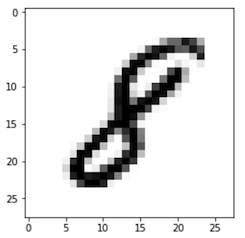

Our mission - we have no choice but to accept it - is to fit a basic CNN on the data and get a good testing accuracy.

We start off by **importing the necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import pickle #pickle is a library that helps us save a lot of different types of data - anything ranging from Pandas dataframes to TensorFlow models

**Formatting Data**

Next, we're going to format our data. Data formatting is a tedious but crucial part of deep learning. It is necessary to format your inputs in a way that will be easy to understand for the model you are trying to train. We have formatted the data for you but in the future, you will have to pay close attention to what the dataset contains and what your model actually needs.

In [ ]:
input_shape = (28, 28, 1)
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data /= 255
test_data /= 255

**Designing Our Model**

Next, lets design our CNN. We use Sequential from Keras to help design our model. The Sequential type of a model lets us add layers one by one in a linear fashion. Our first layer has to be our input layer.

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))# Input layer
model.add(MaxPooling2D(pool_size=(2, 2))) # downsizing images
model.add(Flatten()) # images are 3d so have to flatten them into a (1 x 784) vector
model.add(Dense(128, activation=tf.nn.relu, use_bias=True)) # adding a Dense layer of 128 neurons with relu
model.add(Dropout(0.5)) #Implementing dropout regularization with p = 0.5
model.add(Dense(70, activation=tf.nn.relu, use_bias=True))
model.add(Dropout(0.5))
model.add(Dense(10,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

We have now designed our model by putting in all the layers. We haven't yet compiled our model with an optimizer or a loss function.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=train_data,y=train_labels, epochs=12)

Finally, we have our model trained. We want to check our model's accuracy by running it on the test data, and we do this by using the evaluate function.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('\nTest accuracy:', test_acc)

And thats it! Congratulations, we have just made our first CNN! Remember that a large portion of the learning process is going in and actually doing the work. Feel free to make a copy of this notebook by clicking on "File" -> "Save a copy in Drive" and experiment with different layers, optimizers, activation functions, etc, and email us at ucla.acm.ai@gmail.com for any doubts/help!